<a href="https://colab.research.google.com/github/CharlotteY2003/MIT-Futuremakers/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.optimizers import SGD
from keras import regularizers

#Data Preprocessing

In [2]:
data = pd.read_csv('housepricedata.csv')
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
data = data.values

In [4]:
y = data[:, 10]
X = data[:, 0:10]

In [5]:
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [6]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_scale, y, test_size = .3)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = .5)

In [7]:
print(X_train.shape)

(1022, 10)


#First Model Development (Good and fully connected neural network)

In [8]:
model = Sequential()
model.add(Dense(units = 32, activation='relu', input_shape = (10,)))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [9]:
model.compile(optimizer = 'sgd', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 100)

In [11]:
model.evaluate(X_test, y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8813


0.8812785148620605

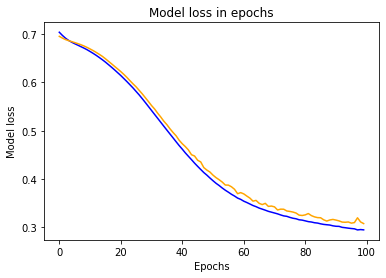

In [12]:
plt.plot(history.history['loss'], color = 'blue', label = 'training')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('Model loss in epochs')
plt.plot(history.history['val_loss'], color='orange', label = 'validation')
plt.show()

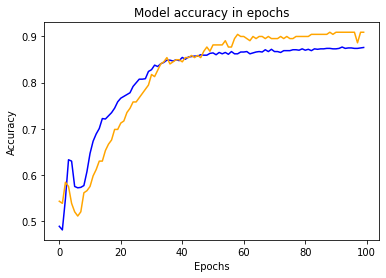

In [13]:
plt.plot(history.history['accuracy'], color = 'blue', label = 'training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model accuracy in epochs')
plt.plot(history.history['val_accuracy'], color='orange', label = 'validation')
plt.show()

#Second Model Development(FNN with Regularization)

In [14]:
model = Sequential()
model.add(Dense(1000, activation = 'relu', input_shape=(10,), kernel_regularizer=regularizers.l2(.01)))
model.add(Dropout(.3))
model.add(Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(.01)))
model.add(Dropout(.3))
model.add(Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(.01)))
model.add(Dropout(.3))
model.add(Dense(1000, activation = 'relu', kernel_regularizer=regularizers.l2(.01)))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'sigmoid', kernel_regularizer=regularizers.l2(.01)))

In [15]:
model.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 32, epochs = 100)

Epoch 1/100
32/32 [==============================] - 4s 66ms/step - loss: 30.8216 - accuracy: 0.4900 - val_loss: 30.5284 - val_accuracy: 0.4886
Epoch 2/100
32/32 [==============================] - 2s 49ms/step - loss: 30.4342 - accuracy: 0.5159 - val_loss: 30.1479 - val_accuracy: 0.4566
Epoch 3/100
32/32 [==============================] - 2s 48ms/step - loss: 30.0535 - accuracy: 0.5371 - val_loss: 29.7722 - val_accuracy: 0.4566
Epoch 4/100
32/32 [==============================] - 2s 48ms/step - loss: 29.6784 - accuracy: 0.5417 - val_loss: 29.4013 - val_accuracy: 0.4566
Epoch 5/100
32/32 [==============================] - 2s 48ms/step - loss: 29.3080 - accuracy: 0.5330 - val_loss: 29.0352 - val_accuracy: 0.4566
Epoch 6/100
32/32 [==============================] - 2s 47ms/step - loss: 28.9433 - accuracy: 0.5212 - val_loss: 28.6735 - val_accuracy: 0.4566
Epoch 7/100
32/32 [==============================] - 2s 48ms/step - loss: 28.5835 - accuracy: 0.5148 - val_loss: 28.3165 - val_accuracy:

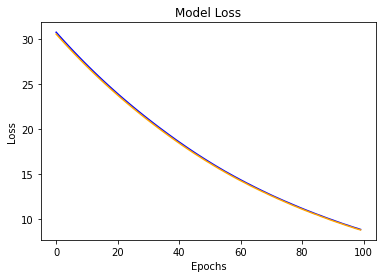

In [17]:
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'orange', label = 'validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

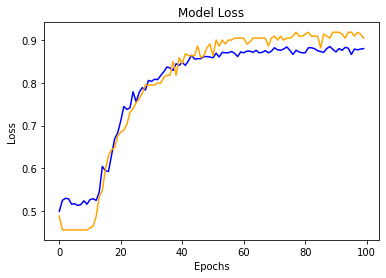

In [18]:
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'valiation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()